We want to predict a categorical variable from a bunch of continuous variables. We'll try logistic regression!

First we can try predict the categorical variable as if it were continuous, using OLS regression. If we do this, we find that our result is a little hard to interpret, since the predictions are not bounded between zero and 1 and thus can't be interpreted as probabilities. I guess we could rescale the answers so that they do fit between 0 and 1, but I'm not sure how? Oh, I just read a little further - the logistic function does that!!


In [9]:
from alldsfsfuncs import estimate_beta, rescale, predict, plot_histogram, dot, vector_add
from matplotlib import pyplot as plt

data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = map(list, data) # change tuples to lists

x = [[1] + row[:2] for row in data] # each element is [1, experience, salary]
y = [row[2] for row in data]        # each element is paid_account

rescaled_x = rescale(x)
beta = estimate_beta(rescaled_x,y) # [0.26,0.43,-0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_x]



In [2]:
print predictions

[0.11216349367166872, 0.2971565015999905, 0.05930985470235117, 0.238797494885357, 0.15841526001088935, 0.42819585131707355, 0.3896565199212916, 0.15180987302365223, 0.3819493565135631, 0.5823584484359118, 0.26522255719144566, -0.04860273325583664, 0.6924728320565119, 0.17383134400491607, 0.16501888981955637, 0.1958563293433202, 0.15511168792798571, 0.22778675939472498, -0.061817021587451004, 0.40617262315723957, 0.043895527886894464, 0.577951342753947, 0.0240758525680429, 0.23769571846486567, 0.2817456891416741, 0.6043781622386057, -0.07942962970818002, 0.20906534613922445, 0.8003836628361294, -0.11466890337819852, -0.1091600212757422, -0.15871711687643675, 0.1518046014879419, 0.12757957766569555, 0.3390046766143863, 0.179333197393092, 0.5768460519763154, 0.0009526051662877011, 0.38965300556415144, 0.09675092403478203, 0.34671184002211475, 0.2002564063110049, 0.11216349367166872, 0.354415489072703, 0.4755406081839351, 0.5085780861915412, 0.546015641166832, 0.35001541210501824, -0.23910

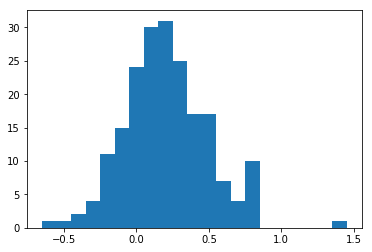

In [3]:
plot_histogram(predictions, 0.1)

In [4]:
print beta

[0.2599620403086356, 0.4389534313651651, -0.4277105684179771]


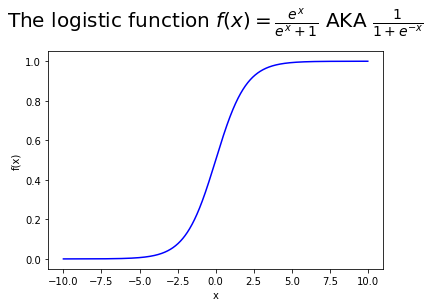

In [5]:
import numpy as np
import math

def logistic(x):
    return 1.0 / (1 + math.exp(-x))

def logistic_prime(x):
    return logistic(x)*(1 - logistic(x))


xs = np.arange(-10,10,0.01)


fig, ax = plt.subplots(1)

ax.plot(xs, map(logistic, xs), "b")
ax.set(xlabel ="x", ylabel = "f(x)")
ax.set_title( "The logistic function $f(x) = \\frac{e^x}{e^x+1}$ AKA $\\frac{1}{1+e^{-x}}$", fontsize =20, y=1.08)


plt.show()


Note that the logistic function takes arbitrary inputs and maps them to between 0 and 1. So far it's not really clear to me why we should interpret these numbers as probabilities, other than the fact they are between 0 and 1.

There's a claim that any process that maximises the log of a function, also maximises the function: Let's just plot a few functions and eyeball things to make sure that appears to be true"

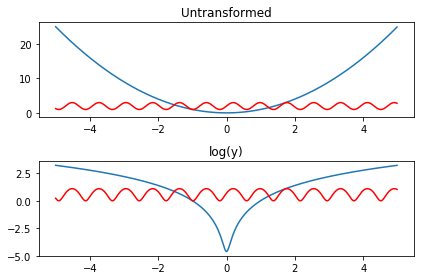

In [6]:
incr = 0.01
xs = np.arange(-5,5,incr)

ys = [x**2+incr for x in xs]
log_ys = [np.log(y) for y in ys]

ys2 = [np.sin(8*x)+2 for x in xs]
log_ys2 = map(np.log, ys2)

fig, axs = plt.subplots(2)

ax1, ax2 = axs

ax1.plot(xs, ys)
ax1.plot(xs, ys2, "r")
ax2.plot(xs, log_ys)
ax2.plot(xs, log_ys2,"r")


ax1.set(title = "Untransformed")
ax2.set(title = "log(y)")

plt.tight_layout()
plt.show()

Yep, $log(y)$ appears to preserve the extrema of $y$. But be careful about getting too close to a pole of $log(y)$!


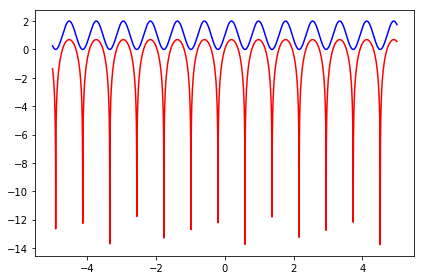

In [7]:
incr = 0.001
xs = np.arange(-5,5,incr)


ys2 = [np.sin(8*x)+1.000001 for x in xs]
log_ys2 = map(np.log, ys2)

fig, axs = plt.subplots(1)

ax2 = axs

ax2.plot(xs, ys2, "b")
ax2.plot(xs, log_ys2,"r")


plt.tight_layout()
plt.show()

In [12]:
def logistic_log_likelihood_i(x_i,y_i,beta):
    if y_i == 1:
        return math.log(logistic(dot(x_i,beta)))
    else:
        return math.log(1 - logistic(dot(x_i, beta)))
    
def logistic_log_likelihood(x, y, beta):
    return sum(logistic_log_likelihood_i(x_i, y_i, beta) for x_i, y_i in zip(x,y))

def logistic_log_partial_ij(x_i, y_i, beta, j):
    """here i is the index of the data point, j the index of the derivative"""
    return (y_i - logistic(dot(x_i,beta)))*x_i[j]

def logistic_log_gradient_i(x_i, y_i, beta):
    """the gradient of the log likelihood corresponding to the ith datapoint"""
    return [logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]

def logistic_log_gradient(x,y,beta):
    return reduce(vector_add,
                  [logistic_log_gradient_i(x_i, y_i, beta)
                   for x_i, y_i in zip(x,y)])

print x[1]
print y[1]

print logistic_log_likelihood(x_train, y_train,[0.2,0.1,-0.00001])

[1, 1.9, 48000]
0
-98.8879652782


In [11]:
from alldsfsfuncs import train_test_split
import random

random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_x, y, 0.33)

#want to maximise log likelihood on the training data
print x_train
print y_train





([1, -0.8772998469863431, -0.4312299161713978], [1, -0.2802583178122901, -0.23814189400510025], [1, 0.35190330131317765, 0.5985728687155223], [1, 0.527503751070252, 0.14803415032749476], [1, 1.08942519029289, 1.3709249573807123], [1, 1.300145730001379, 1.0491115871035497], [1, 1.7567068993697728, 1.0491115871035497], [1, -1.1231404766462474, -0.4312299161713978], [1, 1.7567068993697728, 0.7916608908818198], [1, -1.2636208364519068, -1.0748566567257227], [1, 1.4406260898070387, 1.6283756536024423], [1, -0.03441768815238591, 0.4698475206046573], [1, 1.510866269709869, 1.4996503054915773], [1, 0.17630285155610323, -0.6243179383376952], [1, 1.4406260898070387, 2.2720023941567673], [1, -0.912419936937758, -0.8174059605039927], [1, 1.6864667194669432, 2.5938157644339297], [1, -1.544581556063226, -1.3323073529474527], [1, 1.2650256400499644, 1.1134742611589823], [1, -1.544581556063226, -1.3966700270028853], [1, 0.808464470681571, 1.4352876314361447], [1, 0.21142294150751798, 0.598572868715522

Previously we minimised the OLS equation, this time we'll instead maximise the likelihood fucntion



In [14]:
from alldsfsfuncs import maximise_stochastic

calc_beta = maximise_stochastic(logistic_log_likelihood_i, logistic_log_gradient_i, x_train, y_train, [1,1,0.00001], alpha_0 =0.001)
print calc_beta

[-1.9058123229410375, 4.052970005324224, -3.8782698570235707]


Using these values for beta, we can obtain an estimate of y for each data point

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [29]:
from alldsfsfuncs import precision, recall

prediction = [1 if logistic(dot(x_i, calc_beta)) > 0.5 else 0 for x_i in x_test]

tp, fp, tn, fn = 0,0,0,0

for yhat, y in zip(prediction, y_test):
    if y and yhat:   #using the python fact the 1 is true and 0 is false
        tp += 1
    elif y and not yhat:
        fn += 1
    elif not y and yhat:
        fp += 1
    elif not y and not yhat:
        tn += 1
        
print tp, fp, tn, fn

print precision(tp, fp, fn, tn) #Fraction of predictions "true" that are correct
print recall(tp, fp, fn, tn)  #Fraction of all true positives achieved by model    

14 1 48 3
0.933333333333
0.823529411765
